In [11]:
import pandas as pd

from torch_ecg.augmenters import BaselineWanderAugmenter
from app.ecg.ecg import EcgSignal

ptbxl_data = pd.read_csv(r'C:\Users\baev-\PycharmProjects\ecg-service\data\ptbxl\labels.csv', index_col=0)

ptbxl_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21388 entries, 15709.0 to 11744.0
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           21388 non-null  float64
 1   sex                           21388 non-null  int64  
 2   height                        6918 non-null   float64
 3   weight                        9366 non-null   float64
 4   nurse                         19949 non-null  float64
 5   site                          21372 non-null  float64
 6   device                        21388 non-null  object 
 7   recording_date                21388 non-null  object 
 8   report                        21388 non-null  object 
 9   scp_codes                     21388 non-null  object 
 10  heart_axis                    13228 non-null  object 
 11  infarction_stadium1           5600 non-null   object 
 12  infarction_stadium2           103 non-null    object 
 13

In [12]:
def get_file_paths(filename):
    filename_lr = filename.split('/')[-1].split('_')[0]
    return fr"C:\Users\baev-\PycharmProjects\ecg-service\data\ptbxl\npy_signals100\{filename_lr}.npy"


clean_tags = lambda x: [e.replace("'", "") for e in x[1:-1].split(', ')]
ptbxl_data["file_paths"] = ptbxl_data["filename_lr"].apply(get_file_paths)
ptbxl_data["superdiagnostic"] = ptbxl_data["superdiagnostic"].apply(clean_tags)
ptbxl_data

,age,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,...,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,scp_codes_len,superdiagnostic,superdiagnostic_len,file_paths
patient_id,,,,,,,,,,,,,,,,,,,,,
15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",...,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,3,[NORM],1,C:\Users\baev-\PycharmProjects\ecg-service\data\ptbxl\npy_signals100\00001.npy
13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,"{'NORM': 80.0, 'SBRAD': 0.0}",...,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,2,[NORM],1,C:\Users\baev-\PycharmProjects\ecg-service\data\ptbxl\npy_signals100\00002.npy
20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",...,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,2,[NORM],1,C:\Users\baev-\PycharmProjects\ecg-service\data\ptbxl\npy_signals100\00003.npy
17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",...,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,2,[NORM],1,C:\Users\baev-\PycharmProjects\ecg-service\data\ptbxl\npy_signals100\00004.npy
17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",...,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,2,[NORM],1,C:\Users\baev-\PycharmProjects\ecg-service\data\ptbxl\npy_signals100\00005.npy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,"ventrikulÄre extrasystole(n) sinustachykardie linkstyp mÄssige amplitudenkriterien fÜr linkshypertrophie st & t abnorm, wahrscheinlich anterolaterale ischÄmie oder linksbelastung 4.46 unbestÄtigter bericht","{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'STACH': 0.0}",...,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,4,[STTC],1,C:\Users\baev-\PycharmProjects\ecg-service\data\ptbxl\npy_signals100\21833.npy
20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm inferiorer infarkt wahrscheinlich alt 4.46 unbestÄtigter bericht,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}",...,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,3,[NORM],1,C:\Users\baev-\PycharmProjects\ecg-service\data\ptbxl\npy_signals100\21834.npy
19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,"sinusrhythmus lagetyp normal t abnorm in anterioren ableitungen 4.46 unbestÄtigter bericht Edit: INJAS 50, (ISCAS)","{'ISCAS': 50.0, 'SR': 0.0}",...,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr,2,[STTC],1,C:\Users\baev-\PycharmProjects\ecg-service\data\ptbxl\npy_signals100\21835.npy


In [13]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit(ptbxl_data["superdiagnostic"].values)
mlb.classes_.tolist()

['CD', 'HYP', 'MI', 'NORM', 'STTC']

In [14]:
train_labels = mlb.transform(ptbxl_data["superdiagnostic"].tolist())
ptbxl_data[mlb.classes_.tolist()] = train_labels

In [15]:
from app.ecg.ecg import EcgDataset

valid_df = ptbxl_data[ptbxl_data['strat_fold'] == 9]
test_df = ptbxl_data[ptbxl_data['strat_fold'] == 10]

dataset = EcgDataset(ptbxl_data)
valid_dataset = EcgDataset(valid_df)
test_dataset = EcgDataset(test_df)


CQT kernels created, time used = 0.0040 seconds
CQT kernels created, time used = 0.0055 seconds
CQT kernels created, time used = 0.0055 seconds


C:\Users\baev-\AppData\Local\pypoetry\Cache\virtualenvs\ecg-service-S8mQcxkY-py3.12\Lib\site-packages\nnAudio\utils.py:429: SyntaxWarning: If fmax is given, n_bins will be ignored
  warnings.warn("If fmax is given, n_bins will be ignored", SyntaxWarning)
C:\Users\baev-\AppData\Local\pypoetry\Cache\virtualenvs\ecg-service-S8mQcxkY-py3.12\Lib\site-packages\nnAudio\utils.py:429: SyntaxWarning: If fmax is given, n_bins will be ignored
  warnings.warn("If fmax is given, n_bins will be ignored", SyntaxWarning)
C:\Users\baev-\AppData\Local\pypoetry\Cache\virtualenvs\ecg-service-S8mQcxkY-py3.12\Lib\site-packages\nnAudio\utils.py:429: SyntaxWarning: If fmax is given, n_bins will be ignored
  warnings.warn("If fmax is given, n_bins will be ignored", SyntaxWarning)


In [16]:
ecg, label = dataset[0]

In [17]:
esig = EcgSignal()

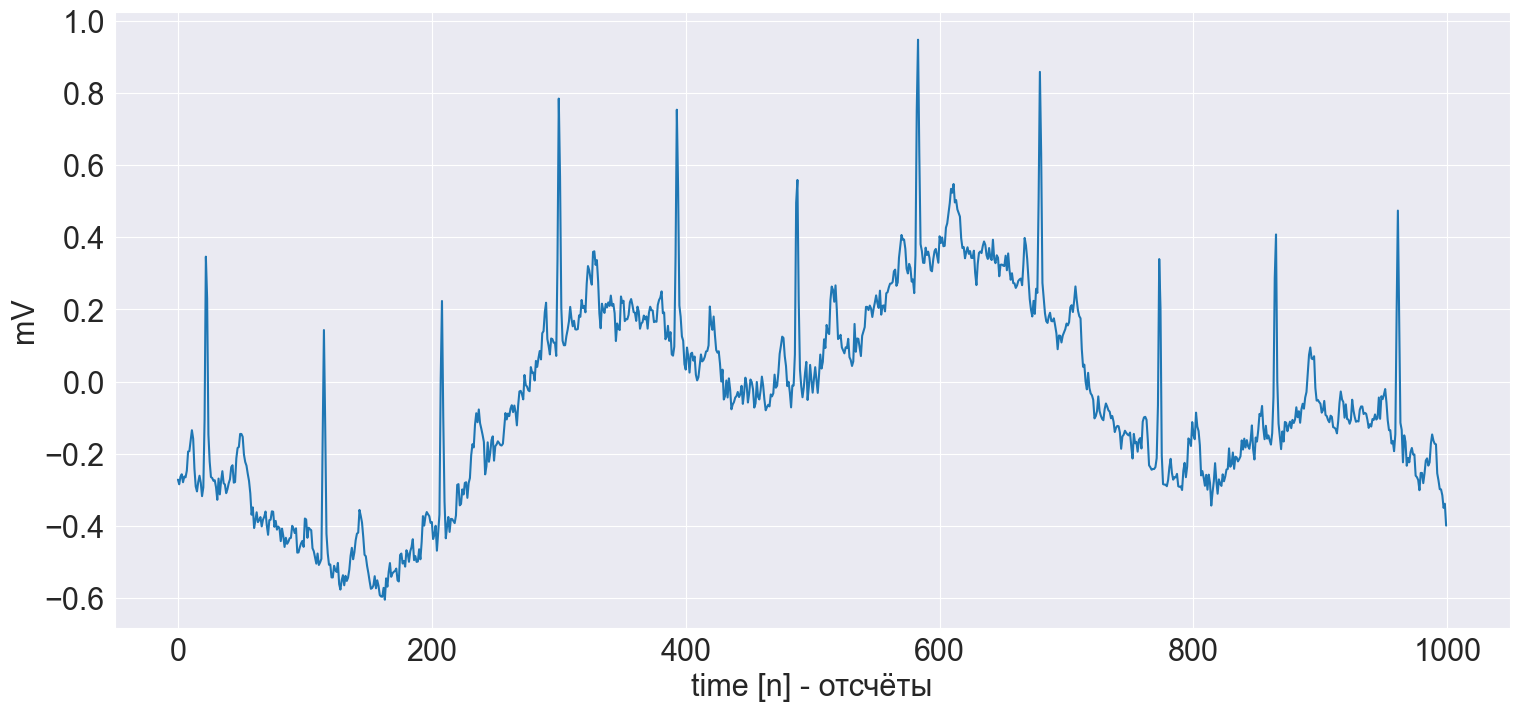

In [28]:
esig.plot_sample(ecg[0][0])

In [23]:

import torch

blw = BaselineWanderAugmenter(100, prob=1)
sig = ecg
label = torch.ones((32, 20))
sig, _ = blw(sig, label)


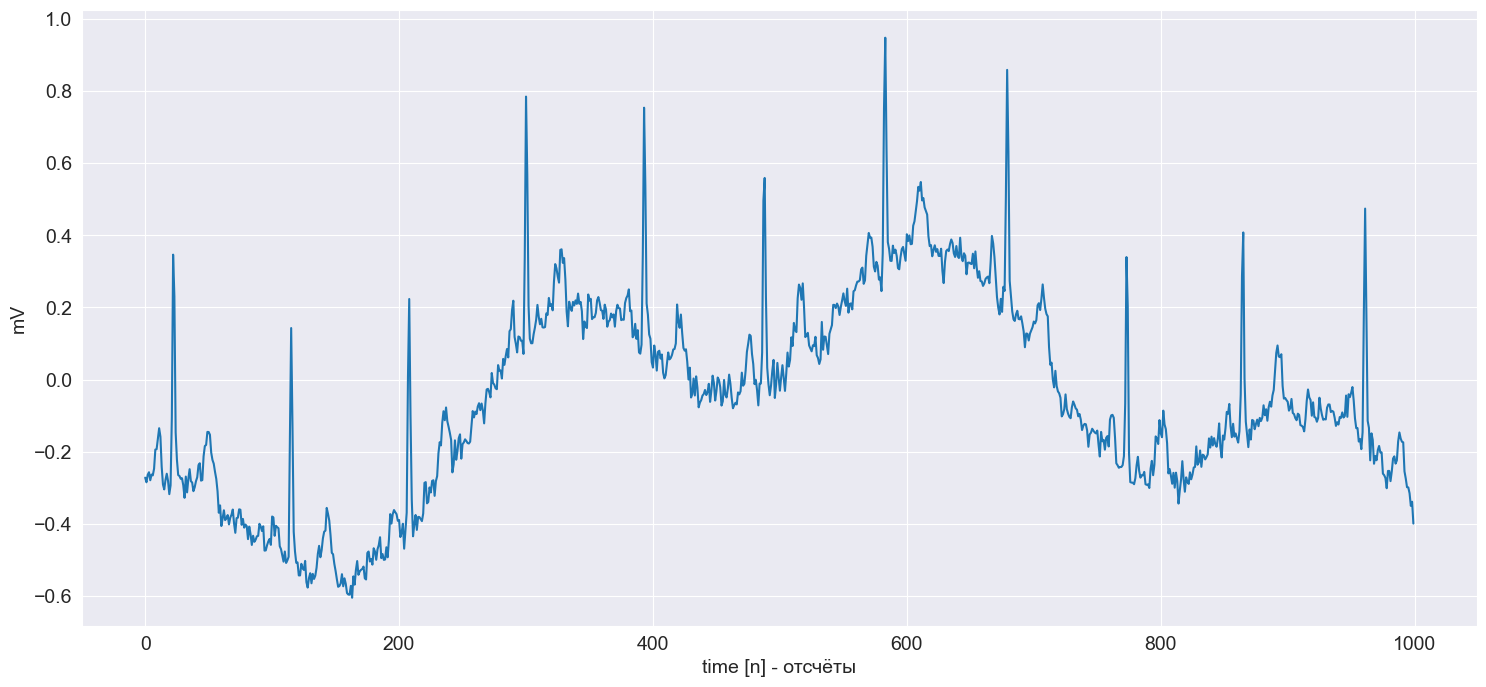

In [27]:
esig.plot_sample(sig[0][0])